## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Image

In [2]:
image = cv2.imread('images/input.jpg')

# Store height and width of the image
height, width = image.shape[:2]

## 3- Translation Matrix

- T is our translation matrix

In [3]:
#       | Sx 0 0 |
#  T  = | 0 Sy 0 |

Text(0.5, 1.0, 'resized')

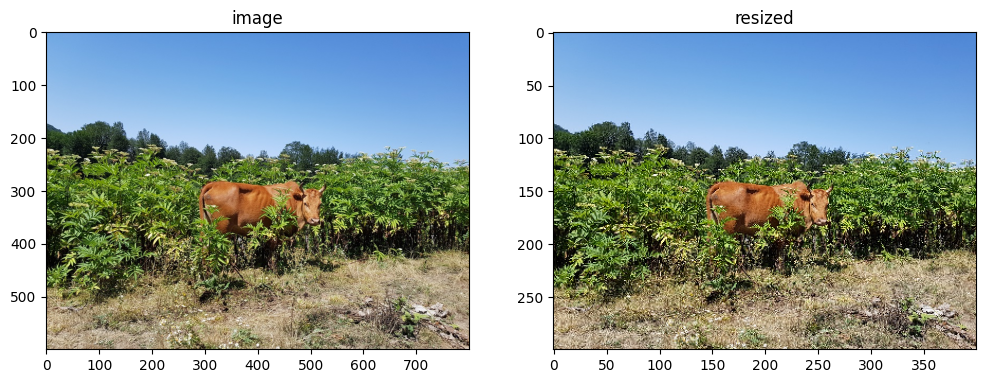

In [4]:
T = np.float32([[0.5, 0, 0], [0, 0.5,0]])

# We use warpAffine to transform the image using the matrix, T
img_resized = cv2.warpAffine(image, T, (width//2, height//2))

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("image")
plt.subplot(122);plt.imshow(img_resized[...,::-1]);plt.title("resized")

## 5- Combination of Translations Matrix

In [5]:
image = cv2.imread('images/input.jpg')
height, width, _ = image.shape

In [6]:
rotation_amount_degree = 10

#  convert rotation amount to radian
theta = rotation_amount_degree * np.pi / 180.0

T1 = np.float32([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]) #Rotate
T2 = np.float32([[0.5, 0], [0, 0.5]]) #Scale
T = np.matmul(T1,T2) 

final_T = np.ones((2,3))*50 #Rotate + Scale
final_T[:,:-1] = T
print(final_T)

[[ 0.49240386 -0.08682409 50.        ]
 [ 0.08682409  0.49240386 50.        ]]


Text(0.5, 1.0, 'result')

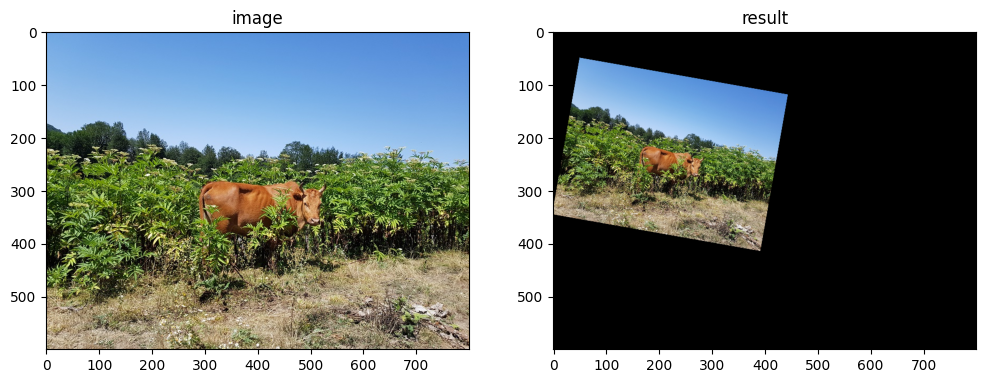

In [7]:
result = cv2.warpAffine(image, final_T, (width, height))

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("image")
plt.subplot(122);plt.imshow(result[...,::-1]);plt.title("result")

## 6- Using "resize" function

In [8]:
# load our input image
image = cv2.imread('images/input.jpg')
cv2.imshow('Original Image', image) 
cv2.waitKey()

# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
cv2.imshow('Scaling - Linear Interpolation', image_scaled) 
cv2.waitKey()

# Let's double the size of our image
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled)
cv2.waitKey()

# Let's skew the re-sizing by setting exact dimensions
img_scaled = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled) 
cv2.waitKey()

cv2.destroyAllWindows()